# Customer Personality Analysis 

- Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.
- Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.


In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import kmeans_plusplus,KMeans,DBSCAN,AgglomerativeClustering
import scipy.cluster.hierarchy as sch
import warnings
warnings.filterwarnings('ignore')

In [13]:
pd.set_option('display.max_columns', 500)

In [14]:
df=pd.read_excel("C:\\Users\\lenovo\\OneDrive\\data science\\DS project\\market comapign clustreing\\marketing_campaign1.xlsx")
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0


<!-- #### Attributes
#### People
-•	ID: Customer's unique identifier
-•	Year_Birth: Customer's birth year
-•	Education: Customer's education level
-•	Marital_Status: Customer's marital status
-•	Income: Customer's yearly household income
-•	Kidhome: Number of children in customer's household
-•	Teenhome: Number of teenagers in customer's household
-•	Dt_Customer: Date of customer's enrollment with the company
-•	Recency: Number of days since customer's last purchase
-•	Complain: 1 if the customer complained in the last 2 years, 0 otherwise
-Products
-•	MntWines: Amount spent on wine in last 2 years
-•	MntFruits: Amount spent on fruits in last 2 years
-•	MntMeatProducts: Amount spent on meat in last 2 years
-•	MntFishProducts: Amount spent on fish in last 2 years
-•	MntSweetProducts: Amount spent on sweets in last 2 years
-•	MntGoldProds: Amount spent on gold in last 2 years
Promotion
-•	NumDealsPurchases: Number of purchases made with a discount
-•	AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
-•	AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
-•	AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
-•	AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
-•	AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
-•	Response: 1 if customer accepted the offer in the last campaign, 0 otherwise
Place
-•	NumWebPurchases: Number of purchases made through the company’s website
-•	NumCatalogPurchases: Number of purchases made using a catalogue
-•	NumStorePurchases: Number of purchases made directly in stores
 -->

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

# Check for the null values

In [20]:
null=((df.isnull().sum())/len(df))*100
null

ID                     0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 1.071429
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Complain               0.000000
Z_CostContact          0.000000
Z_Revenue              0.000000
Response               0.000000
dtype: float64

### There are no null values except the income feature which has the 1% of null values

# Check for duplicate records

In [17]:
df.duplicated().sum()

0

# Distribution and outlier detection

In [32]:
df.shape[1]

29

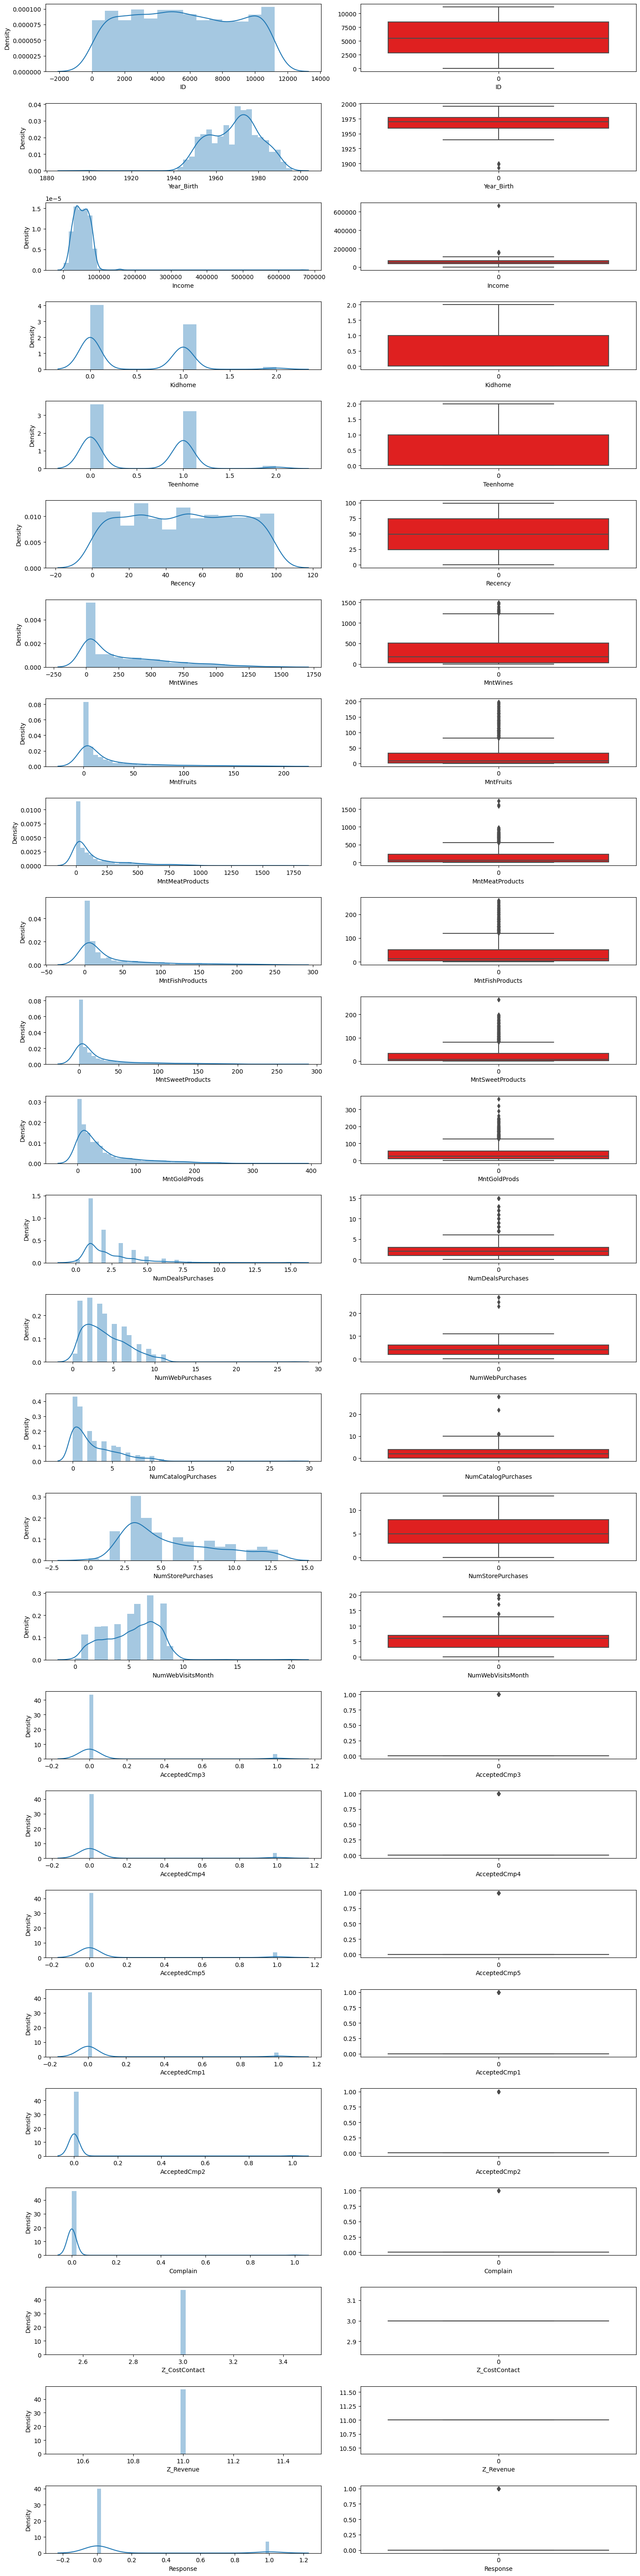

In [33]:
fig,ax=plt.subplots(nrows=df.shape[1]-3, ncols=2, figsize=(15,60))

for i, col in enumerate(df.select_dtypes('number').columns):
    sns.distplot(df[col],ax=ax[i][0])
    sns.boxplot(df[col],ax=ax[i][1],color='red')
    ax[i][0].set_xlabel(col)
    ax[i][1].set_xlabel(col)

plt.tight_layout()


# Skew and Kurtosis

In [35]:
sk=pd.DataFrame()
sk['Skewness']=df.skew()
sk['Kurtosis']=df.kurtosis()
sk

,Skewness,Kurtosis
ID,0.039832,-1.190028
Year_Birth,-0.349944,0.717464
Income,6.763487,159.636700
Kidhome,0.635288,-0.779661
Teenhome,0.407115,-0.986235
Recency,-0.001987,-1.201897
MntWines,1.175771,0.598744
MntFruits,2.102063,4.050976
MntMeatProducts,2.083233,5.516724
MntFishProducts,1.919769,3.096461


### Skewness:

- Skewness measures the asymmetry of the distribution of a variable. A skewness value close to zero indicates a relatively symmetric distribution.
- Most of the variables have skewness values around zero, suggesting that their distributions are approximately symmetric.
Variables like Income, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth, and Response have skewness values greater than zero, indicating a right-skewed (positively skewed) distribution. This suggests that the majority of the data points for these variables are concentrated towards the lower end of the range, with a long tail towards higher values.
- Variables like AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, AcceptedCmp1, AcceptedCmp2, Complain have skewness values significantly greater than zero, indicating a highly right-skewed distribution. This suggests that these variables have a few data points with very high values and the majority of data points with lower values.

### Kurtosis:

- Kurtosis measures the heaviness of the tails and the peakedness of the distribution of a variable. A kurtosis value greater than zero indicates heavier tails and a more peaked distribution compared to a normal distribution (which has a kurtosis value of 0).
- Most of the variables have kurtosis values around zero, suggesting that their distributions are relatively close to a normal distribution.
- Variables like MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, AcceptedCmp1, AcceptedCmp2, Complain have kurtosis values greater than zero, indicating heavier tails and a more peaked distribution compared to a normal distribution. This suggests that these variables have more extreme values and a higher concentration of data points around the mean compared to a normal distribution.

# outlier pct

In [39]:
threshold=3
for i in df.select_dtypes('number').columns:
    lower_bound=df[i].mean()-df[i].std()
    upper_bound=df[i].mean()+df[i].std()
    n_outliers=len(df[(df[i]<lower_bound) | (df[i]>upper_bound)])
    pct_outliers=n_outliers/len(df)*100
    print(f"{i}: {pct_outliers:.2f}% outliers")

ID: 42.19% outliers
Year_Birth: 36.07% outliers
Income: 26.07% outliers
Kidhome: 42.28% outliers
Teenhome: 2.32% outliers
Recency: 42.01% outliers
MntWines: 16.88% outliers
MntFruits: 13.39% outliers
MntMeatProducts: 15.27% outliers
MntFishProducts: 14.55% outliers
MntSweetProducts: 13.53% outliers
MntGoldProds: 14.15% outliers
NumDealsPurchases: 12.81% outliers
NumWebPurchases: 36.88% outliers
NumCatalogPurchases: 16.74% outliers
NumStorePurchases: 28.53% outliers
NumWebVisitsMonth: 35.85% outliers
AcceptedCmp3: 7.28% outliers
AcceptedCmp4: 7.46% outliers
AcceptedCmp5: 7.28% outliers
AcceptedCmp1: 6.43% outliers
AcceptedCmp2: 1.34% outliers
Complain: 0.94% outliers
Z_CostContact: 0.00% outliers
Z_Revenue: 0.00% outliers
Response: 14.91% outliers


# Null imputation(income column)

### since there are very less null values in income feature so we are treating/imputing them with median value,since the income is skewed

In [42]:
import statistics as st
income_median=st.median(df['Income'])
df['Income'].fillna(income_median,inplace=True)
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

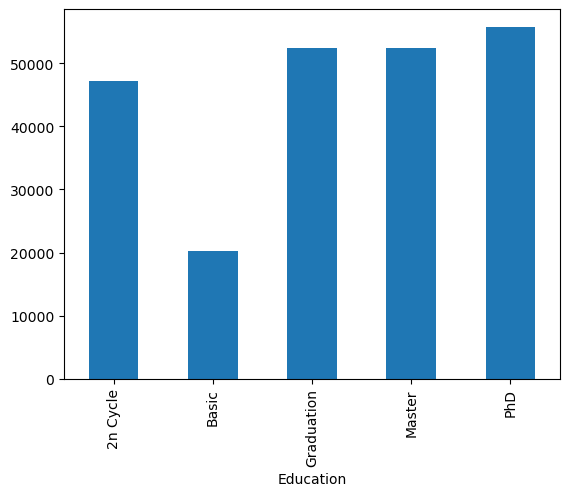

<Figure size 2000x500 with 0 Axes>

In [52]:
inc_edu=df.groupby(['Education'])['Income'].mean()
inc_edu_series=pd.Series(inc_edu)
inc_edu_series.plot(kind='bar')
plt.figure(figsize=(20,5))
plt.tight_layout()
plt.show();

In [97]:
df['current_year']=2023
df['Age']=df['current_year']-df['Year_Birth']
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,current_year,Age,Age Category
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,2023,66,Old Adults
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,2023,69,Old Adults
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,2023,58,Old Adults
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,2023,39,Young adults
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,2023,42,Middle Aged Adults
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0,2023,56,Old Adults
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0,2023,77,Very old adults
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0,2023,42,Middle Aged Adults
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0,2023,67,Old Adults


In [98]:
bins=[0,18,30,45,60,121]
labels=['Teenage','Young adults','Middle Aged Adults','Old Adults','Very old adults']
df['Age Category']=pd.cut(df['Age'],bins=bins,labels=labels)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,current_year,Age,Age Category
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,2023,66,Very old adults
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,2023,69,Very old adults
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,2023,58,Old Adults
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,2023,39,Middle Aged Adults
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,2023,42,Middle Aged Adults


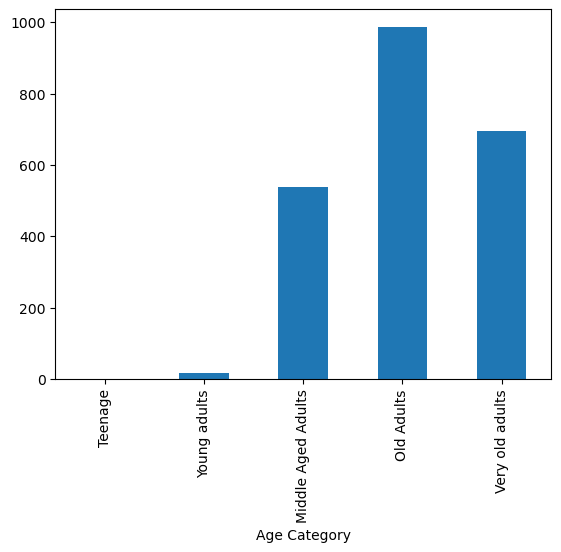

<Figure size 2000x500 with 0 Axes>

In [99]:
age_cat=df.groupby(['Age Category'])['Age Category'].count()
age_cat_series=pd.Series(age_cat)
age_cat_series.plot(kind='bar')
plt.figure(figsize=(20,5))
plt.tight_layout()
plt.show();

# Middle aged and old adults tends to do more shopping rather than other age group people

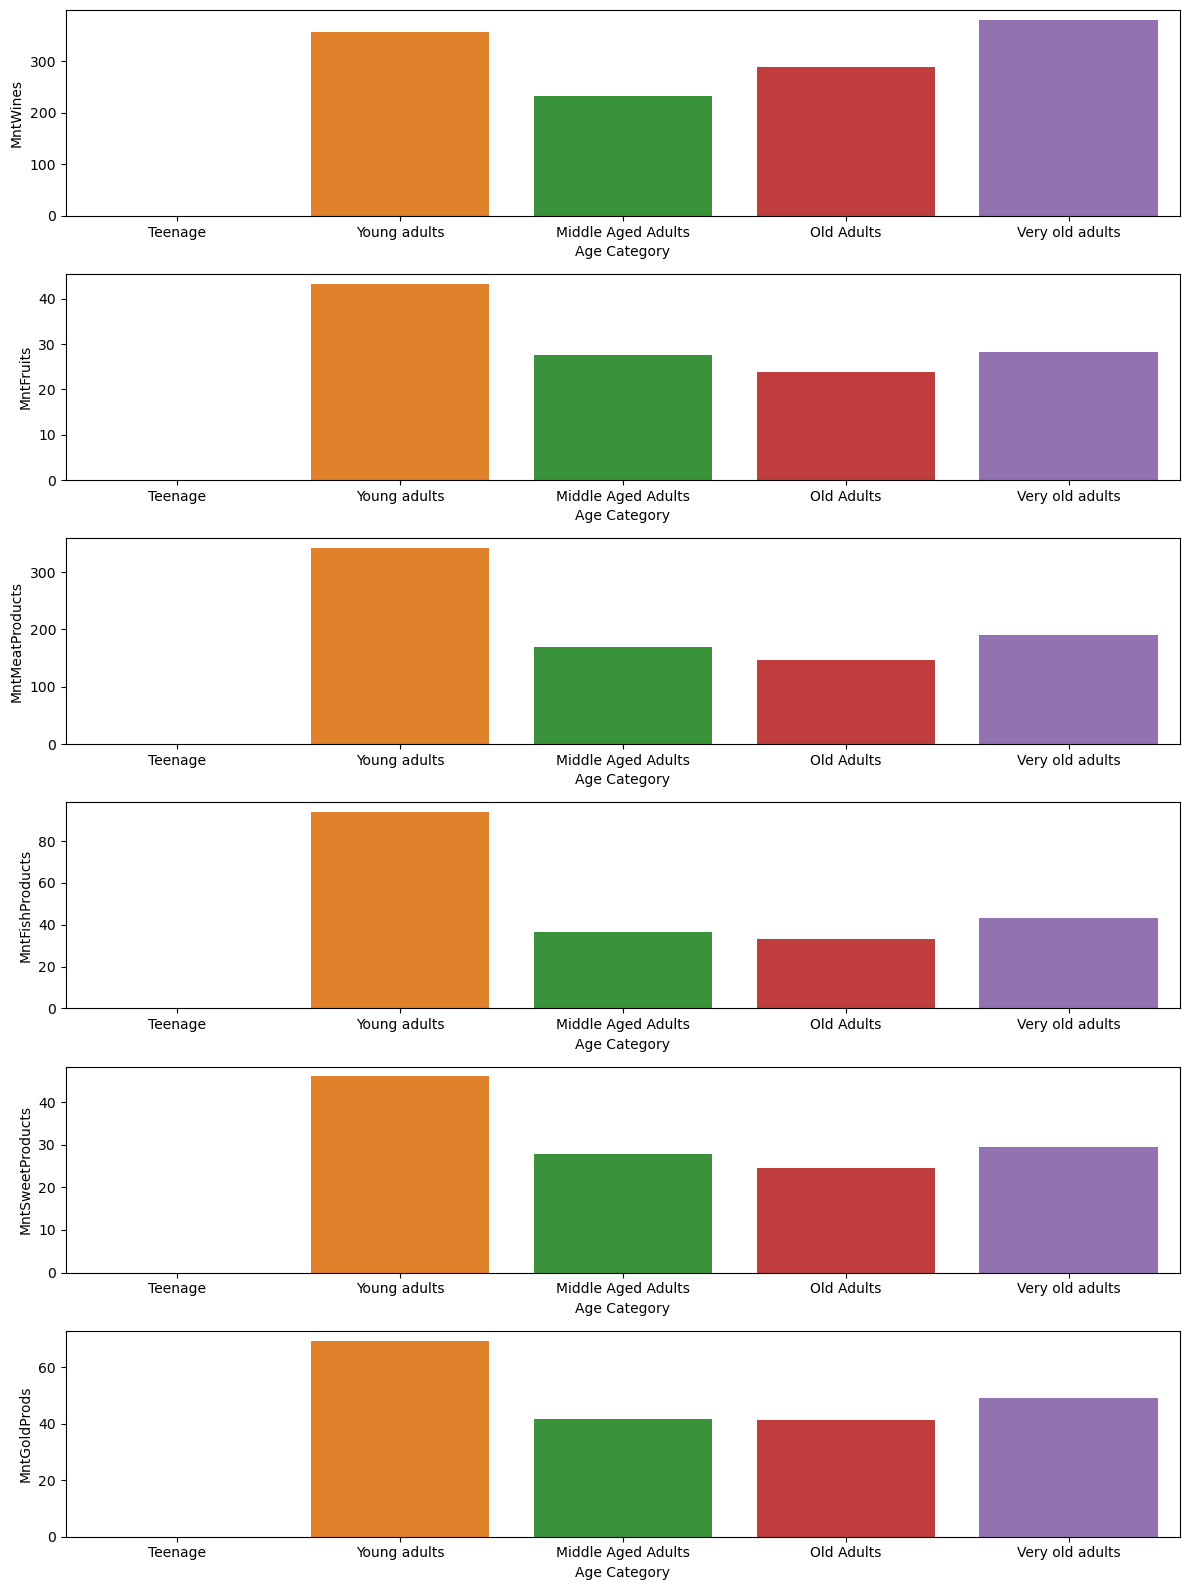

In [100]:
prod_purc = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

fig, axs = plt.subplots(nrows=len(prod_purc), ncols=1, figsize=(12,16))
for i, col in enumerate(prod_purc):
    age_prod_mean = df.groupby(['Age Category'])[col].mean()
    age_prod_mean_series = pd.Series(age_prod_mean)
    sns.barplot(x=age_prod_mean_series.index, y=age_prod_mean_series, ax=axs[i])
    axs[i].set_xlabel('Age Category')
    axs[i].set_ylabel(col)

plt.tight_layout()
plt.show()


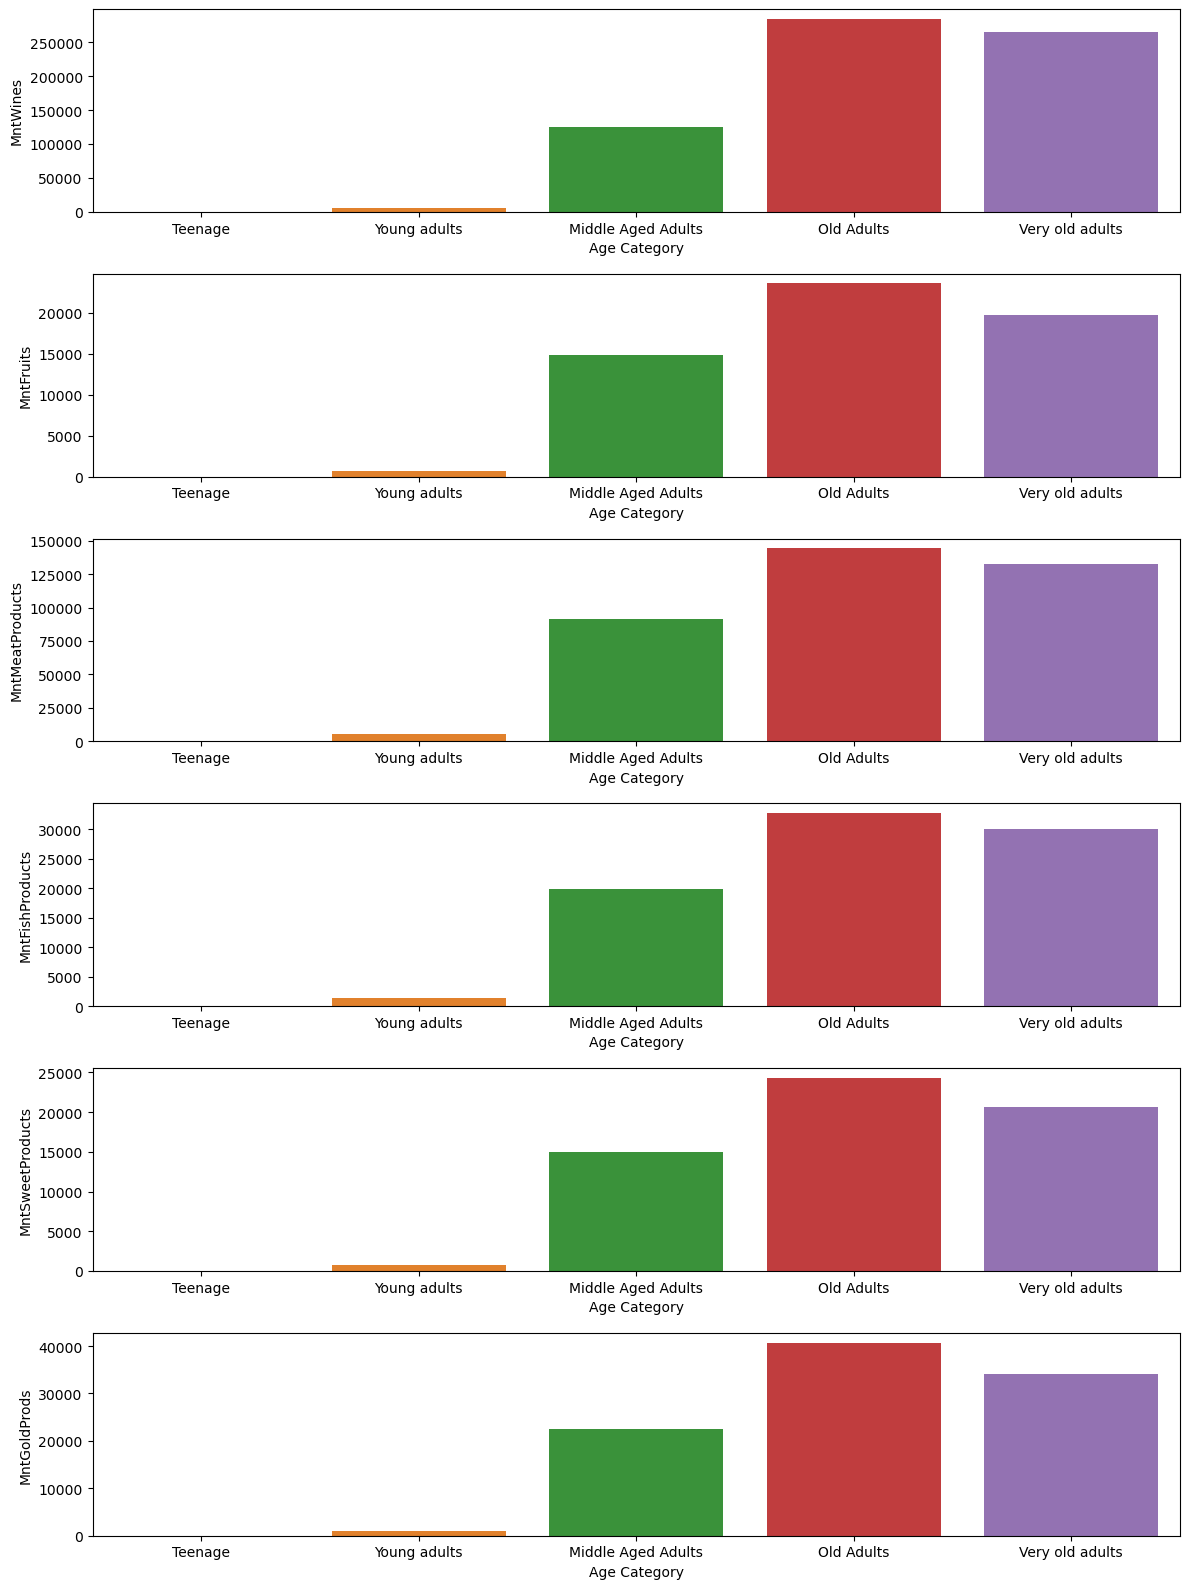

In [101]:
prod_purc = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

fig, axs = plt.subplots(nrows=len(prod_purc), ncols=1, figsize=(12,16))
for i, col in enumerate(prod_purc):
    age_prod_sum = df.groupby(['Age Category'])[col].sum()
    age_prod_sum_series = pd.Series(age_prod_sum)
    sns.barplot(x=age_prod_sum_series.index, y=age_prod_sum_series, ax=axs[i])
    axs[i].set_xlabel('Age Category')
    axs[i].set_ylabel(col)

plt.tight_layout()
plt.show()


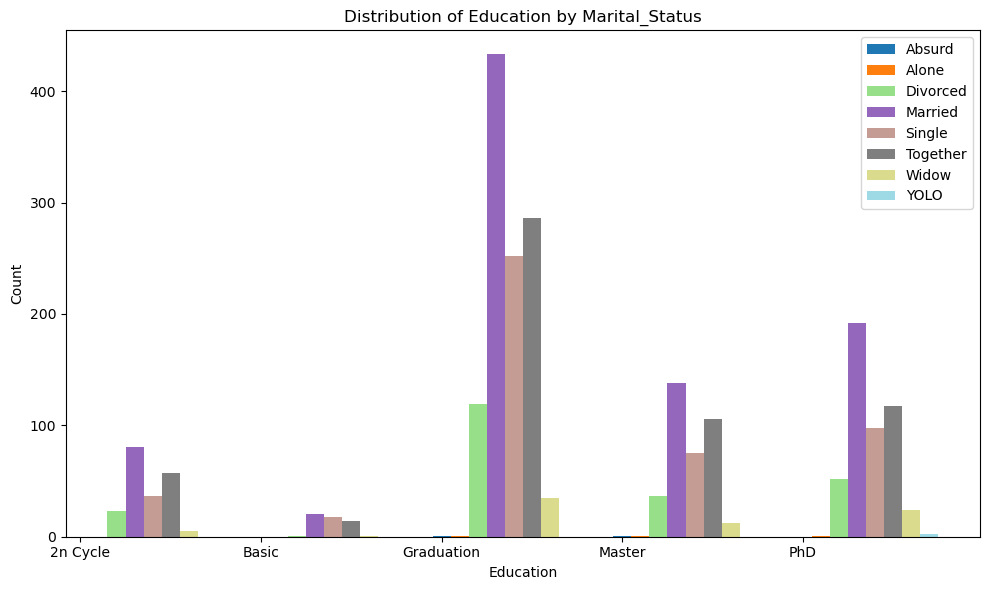

In [102]:
grouped_data = df.groupby(['Education', 'Marital_Status']).size().unstack()

fig, ax = plt.subplots(figsize=(10, 6))

education_categories = grouped_data.index
x = range(len(education_categories))

num_marital_status = grouped_data.shape[1]

bar_width = 0.8 / num_marital_status

colors = plt.cm.get_cmap('tab20', num_marital_status)

for i, marital_status in enumerate(grouped_data.columns):
    counts = grouped_data[marital_status]
    ax.bar([p + i * bar_width for p in x], counts, width=bar_width, color=colors(i), label=marital_status)

ax.set_xticks(x)
ax.set_xticklabels(education_categories)
ax.set_xlabel('Education')
ax.set_ylabel('Count')
ax.set_title('Distribution of Education by Marital_Status')

# Add a legend
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()


- most of the customers are Graduated, also people who are garduated and married are shopping more comparing to other cateogories,further customers who graduated & single and graduated & Together are tend to shop more compare to other categories
- Also most of the customers are graduated,who have done theie graduation,master,Phd who vary with different martial status

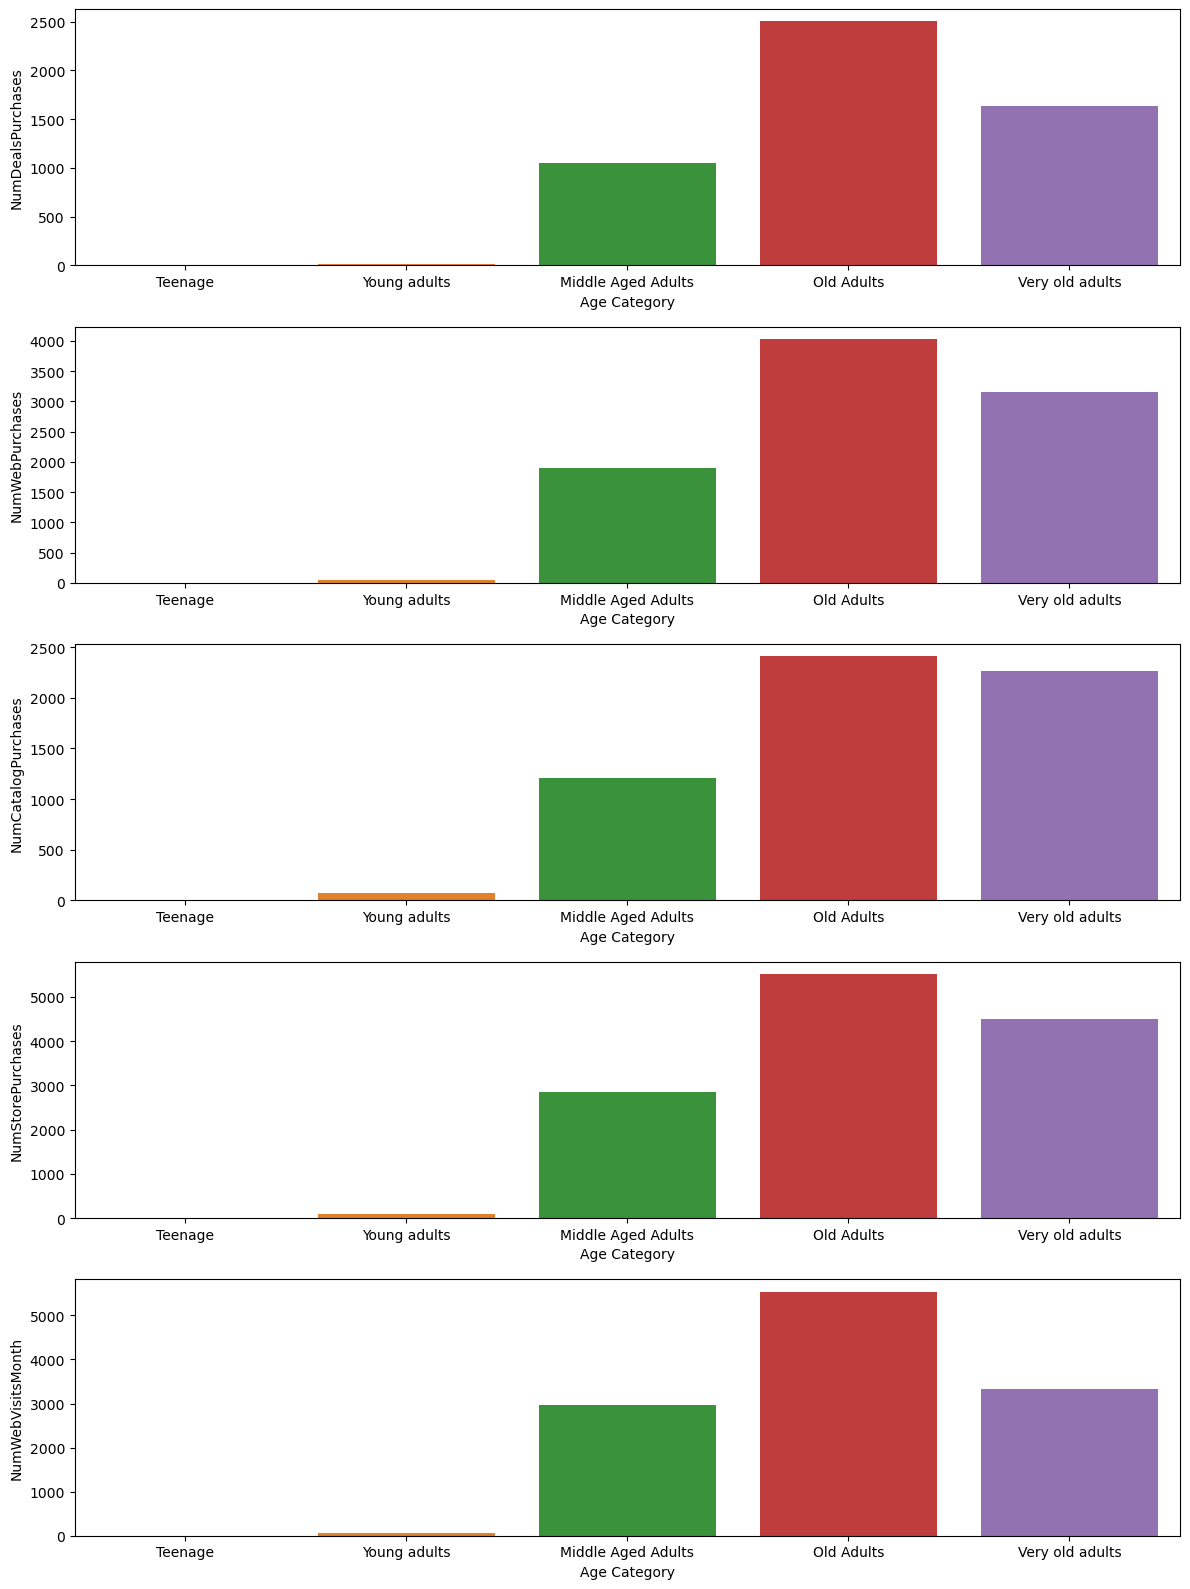

In [103]:
type_purc=['NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth']

fig, axs = plt.subplots(nrows=len(type_purc), ncols=1, figsize=(12,16))
for i, col in enumerate(type_purc):
    age_type_count = df.groupby(['Age Category'])[col].sum()
    age_type_count_series = pd.Series(age_type_count)
    sns.barplot(x=age_type_count_series.index, y=age_type_count_series, ax=axs[i])
    axs[i].set_xlabel('Age Category')
    axs[i].set_ylabel(col)

plt.tight_layout()
plt.show()

- Seems middle aged adults tends to purchase more via NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,secondly old adults do more purchases via different windows 

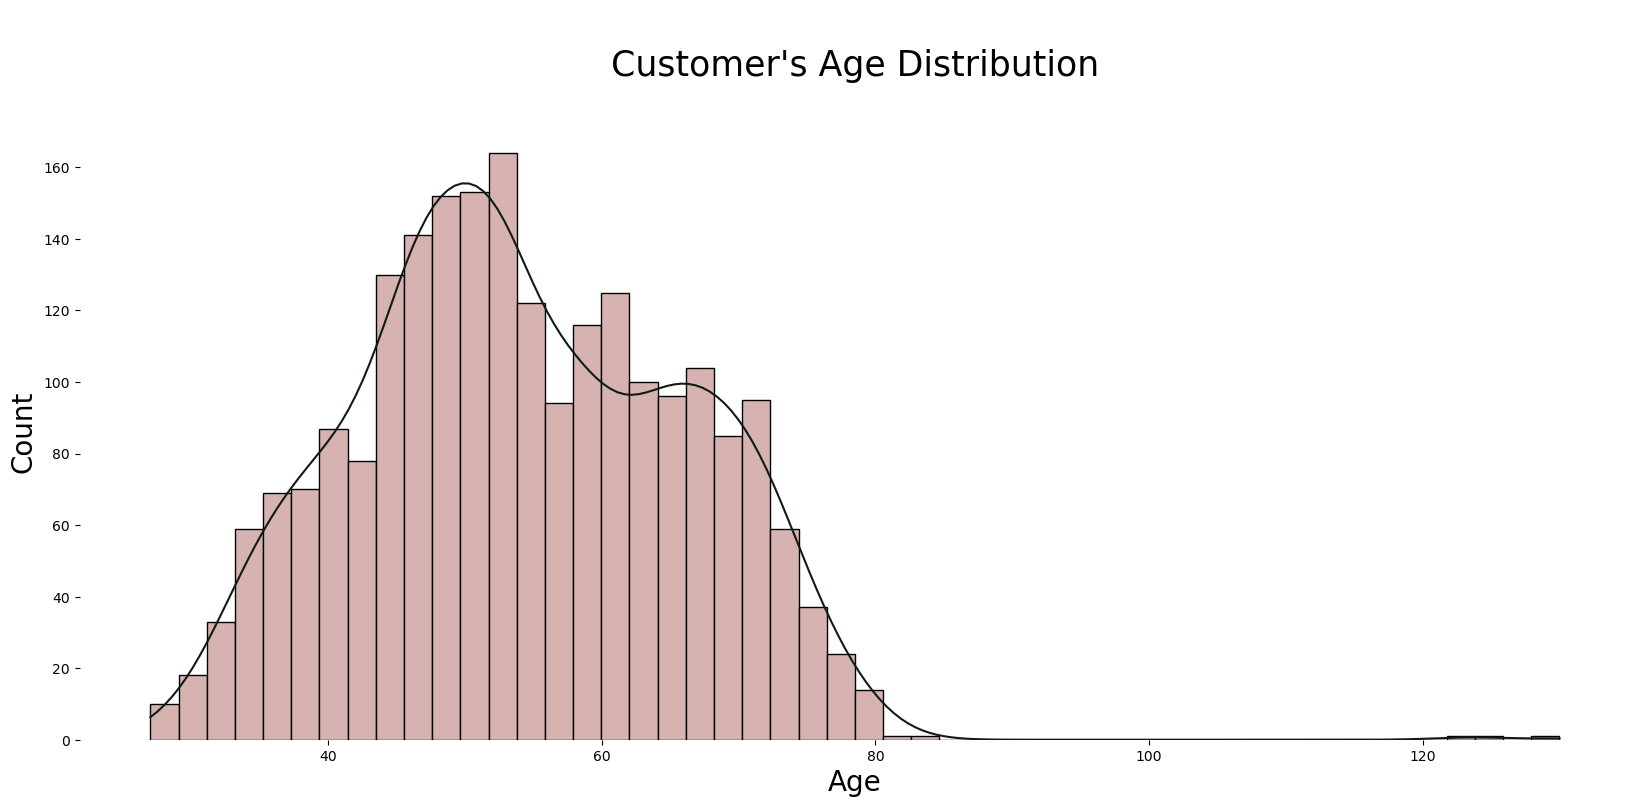

In [106]:
plt.subplots(figsize=(20, 8))
p = sns.histplot(df["Age"],color="#D6B2B1",kde=True,bins=50,alpha=1,fill=True,edgecolor="black")
p.axes.lines[0].set_color("#101B15")
p.axes.set_title("\nCustomer's Age Distribution\n",fontsize=25)
plt.ylabel("Count",fontsize=20)
plt.xlabel("Age",fontsize=20)
sns.despine(left=True, bottom=True)

plt.show()

In [112]:
df['Education'].value_counts()[1]

856

In [109]:
df["Education"]=df["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

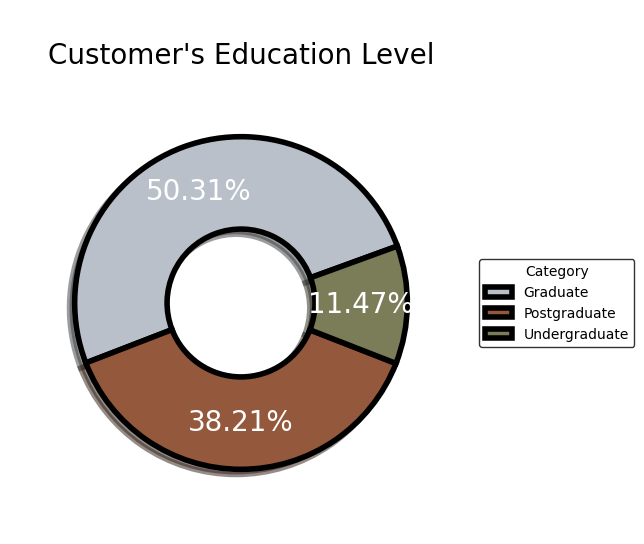

In [118]:
plt.subplots(figsize=(8, 6))

labels = "Graduate","Postgraduate","Undergraduate"
size = 0.5

wedges, texts, autotexts = plt.pie([df["Education"].value_counts()[0],
                                    df["Education"].value_counts()[1],
                                    df["Education"].value_counts()[2]],
                                    explode = (0,0,0),
                                    textprops=dict(size= 20, color= "white"),
                                    autopct="%.2f%%", 
                                    pctdistance = 0.72,
                                    radius=.9, 
                                    colors = ["#B9C0C9","#94583C","#7A7D58"], 
                                    shadow = True,
                                    wedgeprops=dict(width = size, edgecolor = "black", 
                                    linewidth = 4),
                                    startangle = 20)

plt.legend(wedges, labels, title="Category",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1), edgecolor = "black")
plt.title("\nCustomer's Education Level",fontsize=20);
plt.show()

In [121]:
df['No_of_fmembers']=df['Kidhome']+df['Teenhome']
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,current_year,Age,Age Category,No_of_fmembers
0,5524,1957,Graduate,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,2023,66,Very old adults,0
1,2174,1954,Graduate,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,2023,69,Very old adults,2
2,4141,1965,Graduate,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,2023,58,Old Adults,0
3,6182,1984,Graduate,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,2023,39,Middle Aged Adults,1
4,5324,1981,Postgraduate,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,2023,42,Middle Aged Adults,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduate,Married,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0,2023,56,Old Adults,1
2236,4001,1946,Postgraduate,Together,64014.0,2,1,2014-06-10,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0,2023,77,Very old adults,3
2237,7270,1981,Graduate,Divorced,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0,2023,42,Middle Aged Adults,0
2238,8235,1956,Postgraduate,Together,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0,2023,67,Very old adults,1


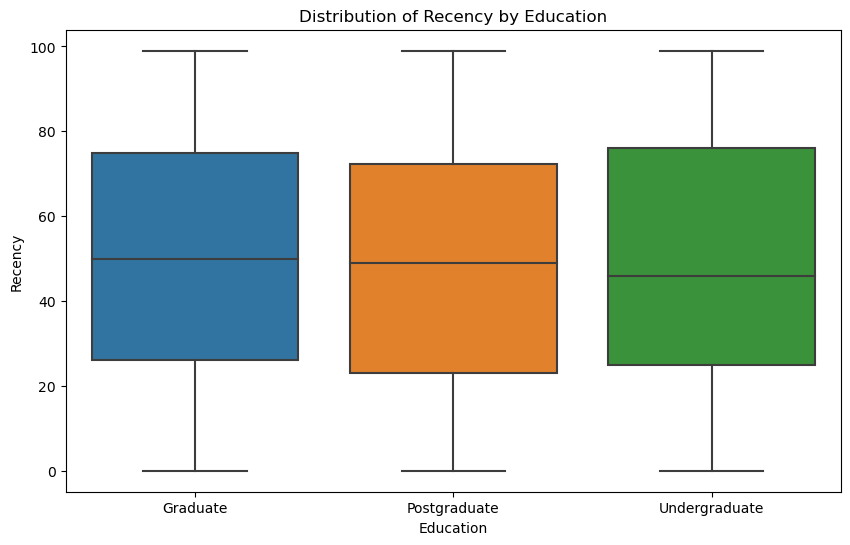

In [124]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Education', y='Recency', data=df)
plt.xlabel('Education')
plt.ylabel('Recency')
plt.title('Distribution of Recency by Education')
plt.show()


In [126]:
# Customer's total spent on products
df['Total_Spent'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

#Narrowing down to these columns to 1 total category
df['Num_Total_Purchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases'] + df['NumDealsPurchases']

- RFM analysis is a marketing technique used to segment customers based on their behavior.

- Recency: How recently a customer has made a purchase

- Frequency: How frequently a customer makes purchases

- Monetary Value: How much a customer spends on purchases

In [128]:
rfc=df.loc[:,['ID','Recency','Total_Spent','Num_Total_Purchases']]
rfc

,ID,Recency,Total_Spent,Num_Total_Purchases
0,5524,58,1617,25
1,2174,38,27,6
2,4141,26,776,21
3,6182,26,53,8
4,5324,94,422,19
...,...,...,...,...
2235,10870,46,1341,18
2236,4001,56,444,22
2237,7270,91,1241,19
2238,8235,8,843,23


In [131]:
rfc.rename(columns={"Num_Total_Purchases":'Frequency',
                   "Total_Spent":'Monetary'},inplace=True)

In [134]:
def rfm_scores(dataframe):
    dataframe["recency_score"] = pd.qcut(dataframe["Recency"], 5, labels=[5, 4, 3, 2, 1])
    dataframe["frequency_score"] = pd.qcut(dataframe["Frequency"], 5, labels=[1, 2, 3, 4, 5])
    dataframe["monetary_score"] = pd.qcut(dataframe["Monetary"], 5, labels=[1, 2, 3, 4, 5])
    dataframe["rfm_score"] = dataframe["recency_score"].astype(str) + dataframe["frequency_score"].astype(str)
    return dataframe

rfm_scores(rfc)
rfc.head()

,ID,Recency,Monetary,Frequency,recency_score,frequency_score,monetary_score,rfm_score
0,5524,58,1617,25,3,5,5,35
1,2174,38,27,6,4,1,1,41
2,4141,26,776,21,4,4,4,44
3,6182,26,53,8,4,2,1,42
4,5324,94,422,19,1,4,3,14
